# Clustering

**Name:** Prithivi Raaj K

**Roll No:** 21z238

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Data Preprocessing

**Importing the Dataset**

In [ ]:
dataset = pd.read_csv("Live.csv")
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
dataset.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [ ]:
dataset.shape

(7050, 16)

**Checking the Null Values and printing them**

In [ ]:
dataset.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

**Dropping the columns with Null Values**

In [ ]:
dataset.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Dataset after dropping Null Values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


**Unique Values in columns**

In [ ]:
len(dataset['status_id'].unique())

6997

In [ ]:
len(dataset['status_published'].unique())

6913

In [ ]:
len(dataset['status_type'].unique())

4

**Dropping columns that have more unique values**

The columns **status_id** and **status_published** has more unique values. So the columns can be dropped as it does not add any value to the data.

In [ ]:
dataset.drop(['status_id','status_published'],axis=1,inplace=True)
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Using LabelEncoder for the status_type column**

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(dataset['status_type'])

In [ ]:
X = dataset.copy()
X['status_type'] = le.transform(X['status_type'])

X = X.values
print(X)

[[  3 529 512 ...   1   1   0]
 [  1 150   0 ...   0   0   0]
 [  3 227 236 ...   1   0   0]
 ...
 [  1   2   0 ...   0   0   0]
 [  1 351  12 ...   0   0   0]
 [  1  17   0 ...   0   0   0]]


**Performing Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 1.37428794  0.64610394  0.32335035 ...  0.07671305  0.47357035
  -0.15574803]
 [-0.74810636 -0.17319166 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]
 [ 1.37428794 -0.00673846  0.01308938 ...  0.07671305 -0.152587
  -0.15574803]
 ...
 [-0.74810636 -0.49312768 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]
 [-0.74810636  0.26131603 -0.23871662 ... -0.17600986 -0.152587
  -0.15574803]
 [-0.74810636 -0.46070173 -0.25220622 ... -0.17600986 -0.152587
  -0.15574803]]


# k - Means Clustering

**Using the Elbow method to find the optimal number of clusters**

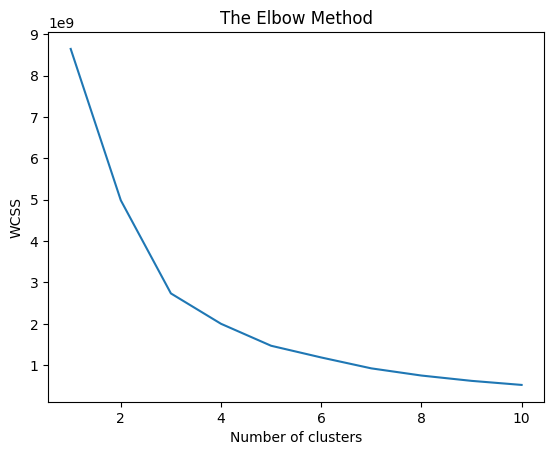

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a knit at **k=3**, therefore, the optimal number of clusters can be taken as 3.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
dataset['cluster'] = kmeans.fit_predict(X)

**Plotting the clusters**

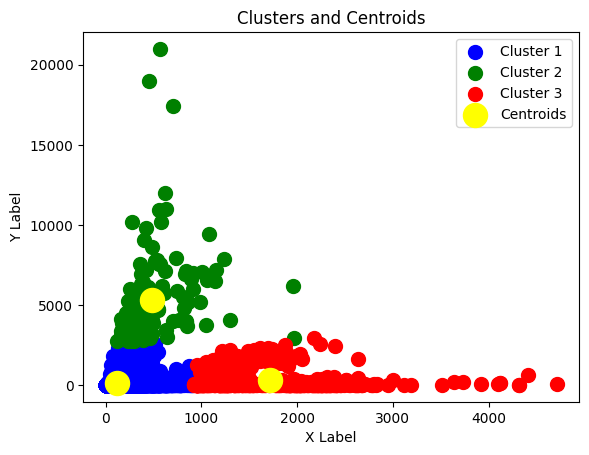

In [ ]:
plt.scatter(X[dataset['cluster'] == 0, 1], X[dataset['cluster'] == 0, 2], s=100, c='blue', label='Cluster 1')
plt.scatter(X[dataset['cluster'] == 1, 1], X[dataset['cluster'] == 1, 2], s=100, c='green', label='Cluster 2')
plt.scatter(X[dataset['cluster'] == 2, 1], X[dataset['cluster'] == 2, 2], s=100, c='red', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.legend()
plt.show()

**Identifying the majority status_type in each cluster for K-Means Clustering**

In [ ]:
cluster_majority_status = dataset.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       photo
1        1       video
2        2       photo


# Hierarchical Clustering

**Using the dendogram to find the optimal number of clusters**

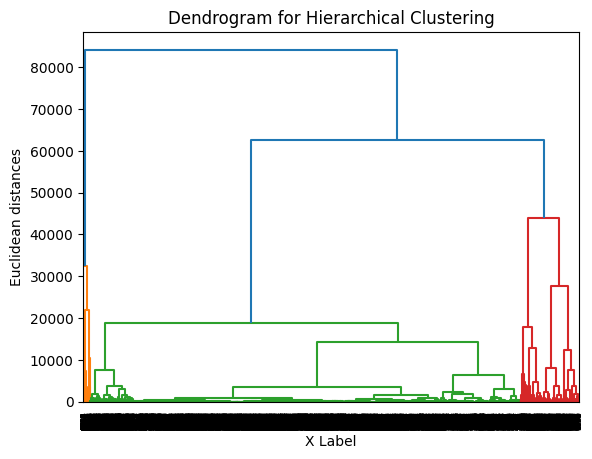

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('X Label')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc.fit(X)
dataset['cluster'] = hc.labels_

**Plotting the clusters**

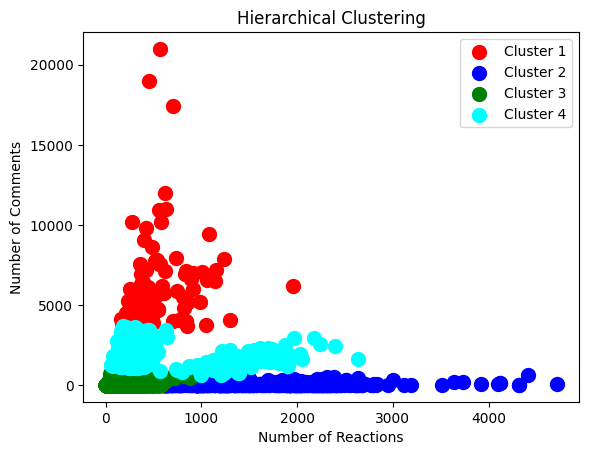

In [ ]:
plt.scatter(X[dataset['cluster'] == 0, 1], X[dataset['cluster'] == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X[dataset['cluster'] == 1, 1], X[dataset['cluster'] == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X[dataset['cluster'] == 2, 1], X[dataset['cluster'] == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X[dataset['cluster'] == 3, 1], X[dataset['cluster'] == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.title('Hierarchical Clustering')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

**Identifying the majority status_type in each cluster for Hierarchical Clustering**

In [ ]:
cluster_majority_status = dataset.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       video
1        1       photo
2        2       photo
3        3       video


# Observations and Inferences

**k - Means Clustering**

Using the **Elbow method**, the optimal number of clusters was obtained as 3.

**Cluster - 0:** Cluster 0 predominantly contains posts with status_type "**Photo**".

**Cluster - 1:** Cluster 1 predominantly contains posts with status_type "**Video**".

**Cluster - 2:** Cluster 2 predominantly contains posts with status_type "**Photo**".

**Hierarchical Clustering**

Using **Dendogram**, the optimal number of clusters was obtained as 4.

**Cluster - 0:** Cluster 0 predominantly contains posts with status_type "**Video**".

**Cluster - 1:** Cluster 1 predominantly contains posts with status_type "**Photo**".

**Cluster - 2:** Cluster 2 predominantly contains posts with status_type "**Photo**".

**Cluster - 3:** Cluster 3 predominantly contains posts with status_type "**Video**".
